In [1]:
%matplotlib inline

In [2]:
import os
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rc_file_defaults()

In [4]:
data = pd.read_csv("data.csv")

In [5]:
if not os.path.exists("./plots"):
    os.makedirs("./plots")

In [6]:
data

,name,country,category,sales,profits,assets,marketvalue
0,Citigroup,United States,Banking,94.71,17.85,1264.03,255.30
1,General Electric,United States,Conglomerates,134.19,15.59,626.93,328.54
2,American Intl Group,United States,Insurance,76.66,6.46,647.66,194.87
3,ExxonMobil,United States,Oil & gas operations,222.88,20.96,166.99,277.02
4,BP,United Kingdom,Oil & gas operations,232.57,10.27,177.57,173.54
5,Bank of America,United States,Banking,49.01,10.81,736.45,117.55
6,HSBC Group,United Kingdom,Banking,44.33,6.66,757.60,177.96
7,Toyota Motor,Japan,Consumer durables,135.82,7.99,171.71,115.40
8,Fannie Mae,United States,Diversified financials,53.13,6.48,1019.17,76.84
9,Wal-Mart Stores,United States,Retailing,256.33,9.05,104.91,243.74


/home/fat-fighter/software/conda/envs/machine-learning/lib/python3.6/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


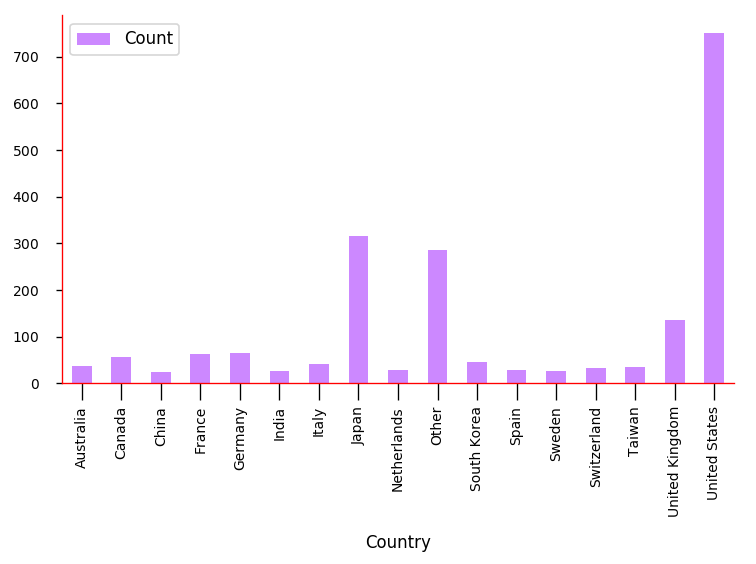

In [7]:
col = "country"
ncol = "Country"

counts = data.groupby(col, as_index=False).count()[[col, "name"]]
counts.loc[counts["name"] <= 20, col] = "Other"

counts.columns = [ncol, "Count"]

counts = counts.groupby(ncol).sum()

counts.plot.bar(color='#cc88ff')
plt.savefig("plots/a.png")
plt.show()

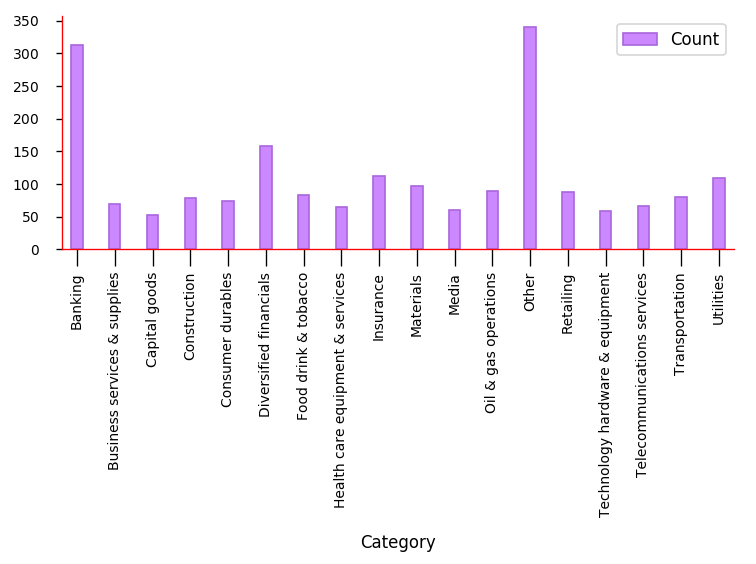

In [8]:
col = "category"
ncol = "Category"

counts = data.groupby(col, as_index=False).count()[[col, "name"]]
counts.loc[counts["name"] <= 50, col] = "Other"

counts.columns = [ncol, "Count"]

counts = counts.groupby(ncol).sum()

counts.plot.bar(color="#cc88ff", width=0.3, edgecolor="#aa66dd")
plt.savefig("plots/b.png")
plt.show()

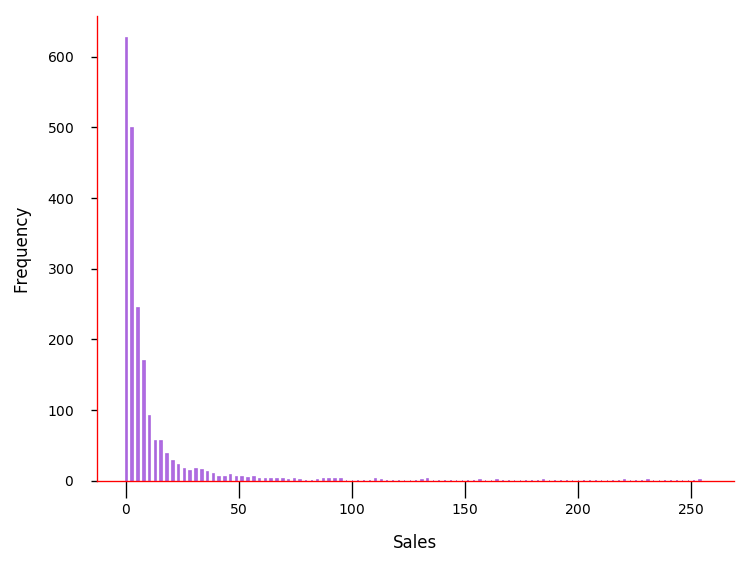

In [9]:
data[["sales"]].plot.hist(
    bins=100, color='#cc88ff', width=0.7, edgecolor="#aa66dd", legend=False
)
plt.xlabel("Sales")
plt.savefig("plots/c.png")
plt.show()

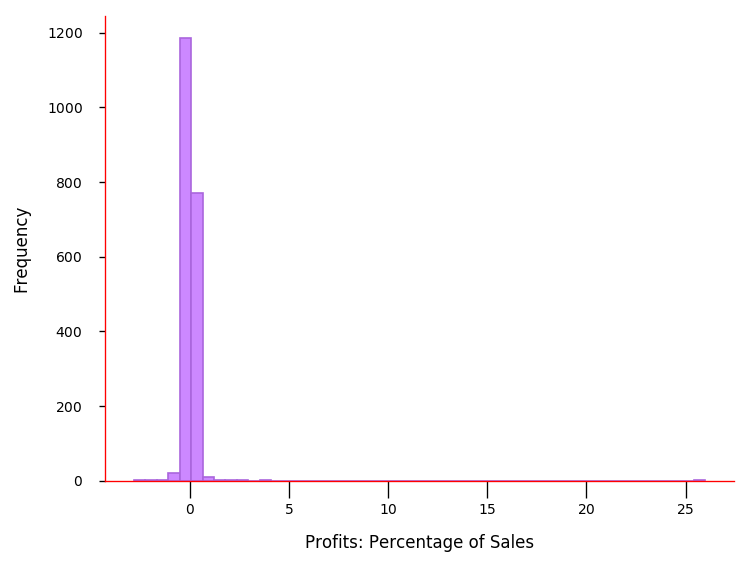

In [10]:
data["profits_perc_sale"] = data["profits"] / data["sales"]
data[["profits_perc_sale"]].plot.hist(
    bins=50, color='#cc88ff', edgecolor="#aa66dd", legend=False
)
plt.xlabel("Profits: Percentage of Sales")
plt.savefig("plots/d.png")
plt.show()

In [13]:
data[["sales", "profits", "assets", "marketvalue"]].corr()

,sales,profits,assets,marketvalue
sales,1.000000,0.404267,0.426154,0.642053
profits,0.404267,1.000000,0.224357,0.547220
assets,0.426154,0.224357,1.000000,0.453999
marketvalue,0.642053,0.547220,0.453999,1.000000
